In [25]:
# dataset from: https://www.kaggle.com/datasets/imtkaggleteam/mental-health

### What is the relationship betweeen year and anxiety disorders in the UK from 1990 to 2019
### The variables of interest:
### Year, Share of population with anxiety disorders

In [26]:
# Importing dependencies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

In [27]:
# Reading the data:
df = pd.read_csv("datasets/1- mental-illnesses-prevalence.csv")

# Renaming the columns for a handy subsequent use:
df = df.rename(columns = {
    "Entity": "entity",
    "Code": "code",
    "Year": "year",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "anxiety_disorder_share"})

# Filtering the data, considering entries only from the UK:
df = df[df["entity"] == "United Kingdom"]

# Retrieving only anxiety disorder - related data:
df = df[["entity", "code", "year", "anxiety_disorder_share"]]

In [28]:
# Displaying the data example:
df.head()

,entity,code,year,anxiety_disorder_share
6030,United Kingdom,GBR,1990,4.181258
6031,United Kingdom,GBR,1991,4.230050
6032,United Kingdom,GBR,1992,4.273662
6033,United Kingdom,GBR,1993,4.308924
6034,United Kingdom,GBR,1994,4.332686


In [29]:
# Data description
df.describe()

,year,anxiety_disorder_share
count,30.000000,30.000000
mean,2004.500000,4.379163
std,8.803408,0.084562
min,1990.000000,4.181258
25%,1997.250000,4.321276
50%,2004.500000,4.364952
75%,2011.750000,4.459814
max,2019.000000,4.495006


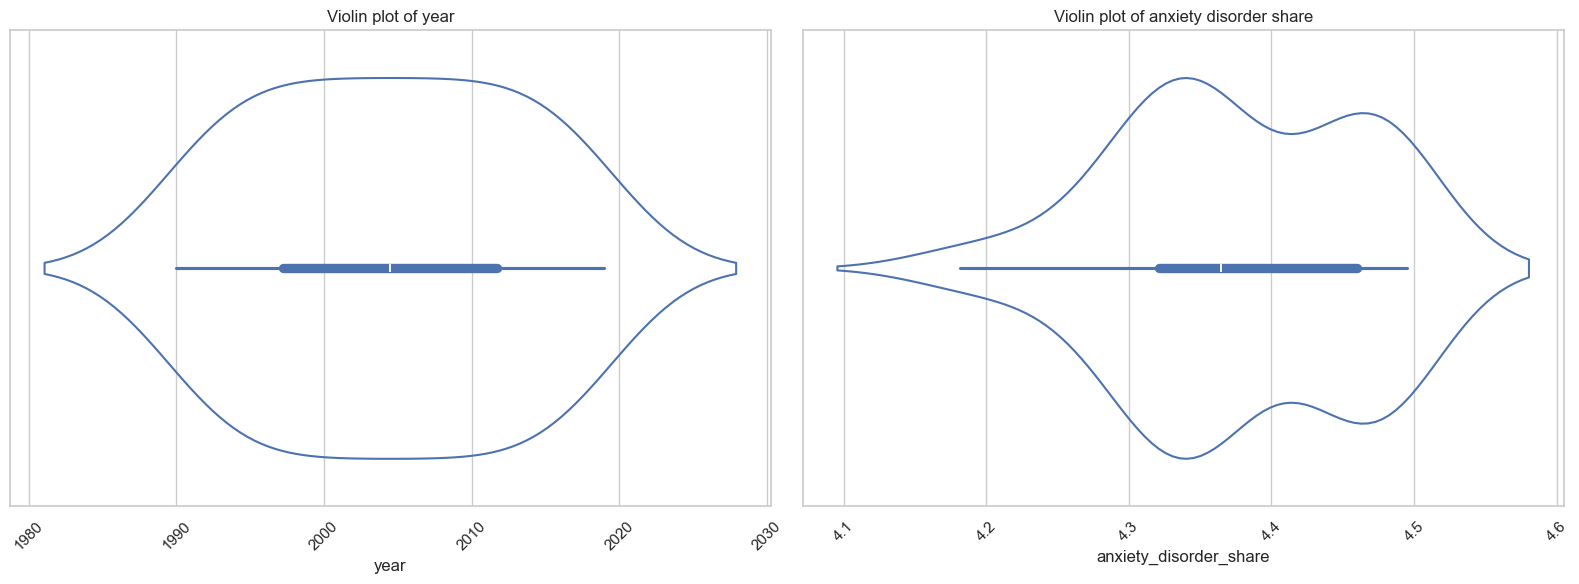

In [30]:
# Setting color style for visualization
sns.set(style="whitegrid")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted figsize

# Violin plot for 'Year' with fill set to False
sns.violinplot(x="year", data=df, ax=axes[0], fill=False)  # fill set to False
axes[0].set_title("Violin plot of year")

# Violin plot for 'Anxiety Disorder Share' with fill set to False
sns.violinplot(x="anxiety_disorder_share", data=df, ax=axes[1], fill=False)  # fill set to False
axes[1].set_title("Violin plot of anxiety disorder share")

# Rotate x-axis labels for better visibility
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
# As variables are not both normally distribured:
# Calculate the Spearman correlation coefficient
spearman_corr = df[['year', 'anxiety_disorder_share']].corr(method='spearman')

# Display the Spearman correlation coefficient
print("Spearman correlation coefficient:")
print(spearman_corr)

Spearman correlation coefficient:
                            year  anxiety_disorder_share
year                    1.000000                0.774861
anxiety_disorder_share  0.774861                1.000000


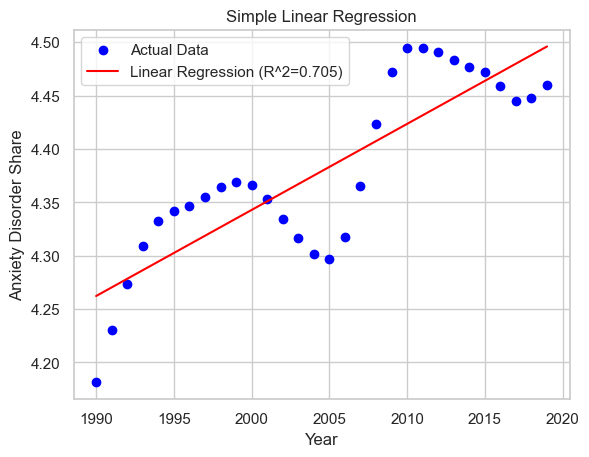

In [40]:
# Simple Linear Regression:

# Prepare the data
X = df['year'].values.reshape(-1, 1)
y = df['anxiety_disorder_share'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate R-squared value
r_squared = model.score(X, y)

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label=f'Linear Regression (R^2={r_squared:.3f})')
plt.xlabel('Year')
plt.ylabel('Anxiety Disorder Share')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


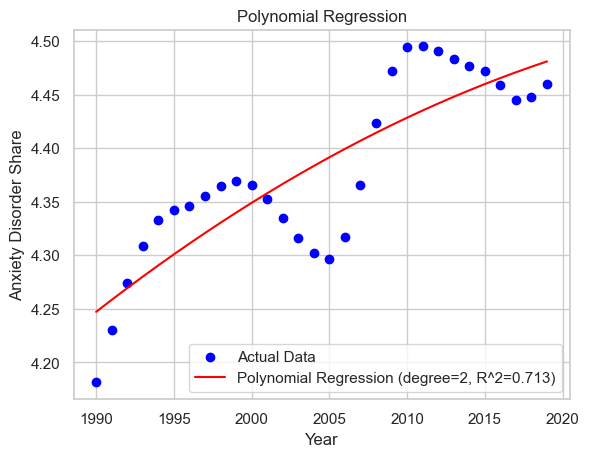

In [43]:
# Polynomial Regression:

# Transforming features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions
y_pred_poly = model_poly.predict(X_poly)

# Calculate R-squared value for polynomial regression
r_squared_poly = model_poly.score(X_poly, y)

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_poly, color='red', label=f'Polynomial Regression (degree=2, R^2={r_squared_poly:.3f})')
plt.xlabel('Year')
plt.ylabel('Anxiety Disorder Share')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


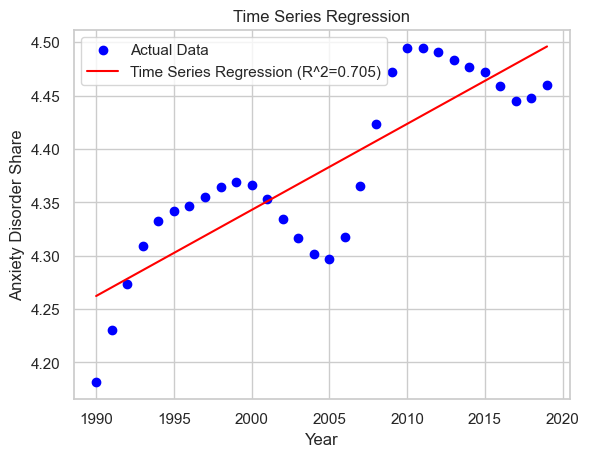

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     66.78
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           6.77e-09
Time:                        17:40:00   Log-Likelihood:                 50.339
No. Observations:                  30   AIC:                            -96.68
Df Residuals:                      28   BIC:                            -93.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.7827      1.978     -5.958      0.0

In [45]:
# Time-series Regression:

# Add a constant for the intercept term
X_ts = sm.add_constant(X)

# Fit time series regression model
model_ts = sm.OLS(y, X_ts).fit()

# Predictions
y_pred_ts = model_ts.predict(X_ts)

# Extract R-squared value from the model summary
r_squared_ts = model_ts.rsquared

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_ts, color='red', label=f'Time Series Regression (R^2={r_squared_ts:.3f})')
plt.xlabel('Year')
plt.ylabel('Anxiety Disorder Share')
plt.title('Time Series Regression')
plt.legend()
plt.show()

# Print model summary
print(model_ts.summary())


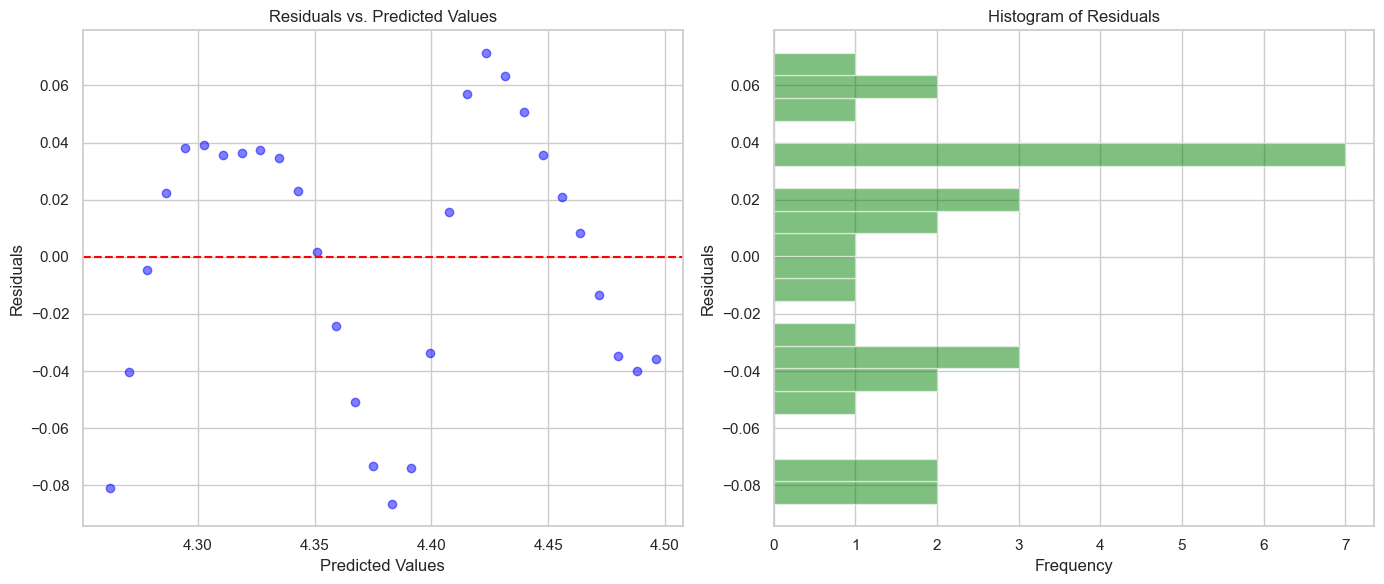

In [46]:
# Compute residuals
residuals = y - y_pred

# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot residuals vs. predicted values
ax1.scatter(y_pred, residuals, color='blue', alpha=0.5)
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Predicted Values')
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.grid(True)

# Plot histogram of residuals
ax2.hist(residuals, color='green', alpha=0.5, bins=20, orientation='horizontal')  # Flipped orientation
ax2.set_title('Histogram of Residuals')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Residuals')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


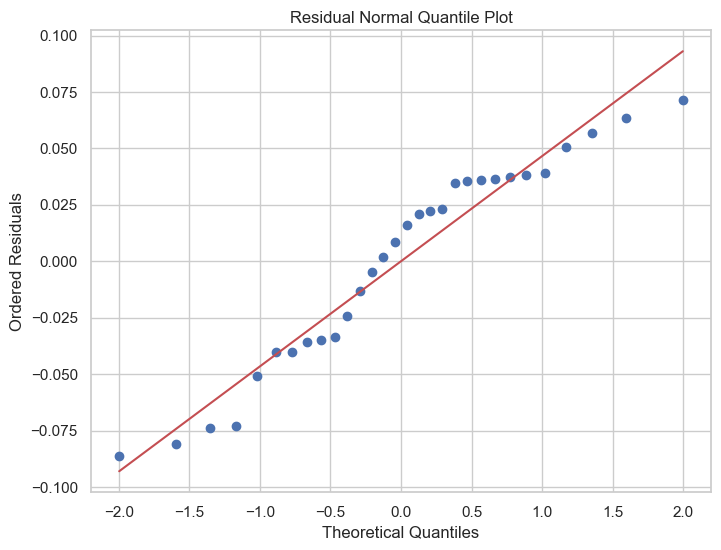

In [47]:
from scipy.stats import probplot

# Compute residuals
residuals = y - y_pred

# Create the residual normal quantile plot
plt.figure(figsize=(8, 6))
probplot(residuals, plot=plt)
plt.title('Residual Normal Quantile Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()
